# ___Regression Model using Artificial Neural Networks___

___What’s the connection between neural networks and regression problems? Can you use a neural network to run a regression? Is there any benefit to doing so?___

_The short answer is __yes__ - because most regression models will not perfectly fit the data at hand. If you need a more complex model, applying a neural network to the problem can provide much more prediction power compared to a traditional regression._

_Neural networks are reducible to regression models—a neural network can “pretend” to be any type of regression model. For example, this very simple neural network, with only one input neuron, one hidden neuron, and one output neuron, is equivalent to a logistic regression. It takes several dependent variables = input parameters, multiplies them by their coefficients = weights, and runs them through a sigmoid activation function and a unit step function, which closely resembles the logistic regression function with its error term._

_When this neural network is trained, it will perform gradient descent to find coefficients that are better and fit the data, until it arrives at the optimal linear regression coefficients (or, in neural network terms, the optimal weights for the model)._

### ___Steps___

_Following are the steps which are commonly followed while implementing Regression Models with Keras._

_Step 1 - Loading the required libraries and modules._

_Step 2 - Loading the data and performing basic data checks._

_Step 3 - Creating arrays for the features and the response variable._

_Step 4 - Creating the training and test datasets._

_Step 5 - Define, compile, and fit the Keras regression model._

_Step 6 - Predict on the test data and compute evaluation metrics._

## ___Model 1 - Petrol Consumption Prediction___

In [ ]:
# Import required libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from math import sqrt

# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization

# Parameter Tuning
from keras.wrappers.scikit_learn import KerasRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [ ]:
# Reading the data

df = pd.read_csv('/content/petrol_consumption.csv') 
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [ ]:
df.shape

(48, 5)

In [ ]:
df.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [ ]:
# Data Preprocessing

X = df.iloc[:, 0:4].values
y = df.iloc[:, 4].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### ___Building a Neural Network___

In [ ]:
# Creating the Artificial Neural Network

# Creating a Sequential Pipeline
model = Sequential()

# Input Layer
model.add(Dense(units = 100, activation= 'relu', input_dim = X.shape[1]))

# First Hidden Layer
model.add(Dense(units = 50, activation= 'relu'))

# Second Hidden Layer
model.add(Dense(units = 25, activation= 'relu'))

# Output Layer
model.add(Dense(units = 1, activation='linear'))

# Compiling the model
model.compile(optimizer = 'adam', loss="mean_squared_error", metrics = ['mean_squared_error'])

# Fitting the Model
model.fit(X_train, y_train, batch_size = 2, epochs = 100, validation_split = 0.2)

Epoch 1/100
15/15 [==============================] - 0s 9ms/step - loss: 341975.6562 - mean_squared_error: 341975.6562 - val_loss: 402629.2188 - val_mean_squared_error: 402629.2188
Epoch 2/100
15/15 [==============================] - 0s 2ms/step - loss: 341514.6875 - mean_squared_error: 341514.6875 - val_loss: 402066.9062 - val_mean_squared_error: 402066.9062
Epoch 3/100
15/15 [==============================] - 0s 2ms/step - loss: 340887.5938 - mean_squared_error: 340887.5938 - val_loss: 400994.8125 - val_mean_squared_error: 400994.8125
Epoch 4/100
15/15 [==============================] - 0s 2ms/step - loss: 339723.1562 - mean_squared_error: 339723.1562 - val_loss: 398835.1875 - val_mean_squared_error: 398835.1875
Epoch 5/100
15/15 [==============================] - 0s 2ms/step - loss: 337173.0000 - mean_squared_error: 337173.0000 - val_loss: 394863.6250 - val_mean_squared_error: 394863.6250
Epoch 6/100
15/15 [==============================] - 0s 2ms/step - loss: 332262.3750 - mean_squ

In [ ]:
# Predictions

model.predict(X_test)

array([[615.4757 ],
       [530.43555],
       [605.8027 ],
       [592.91504],
       [680.8769 ],
       [617.01953],
       [620.1089 ],
       [623.64185],
       [460.0353 ],
       [475.9202 ]], dtype=float32)

In [ ]:
# Metrics

pred_train = model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train)))

pred = model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred)))

57.85515960118395
84.11337498995587


## ___Model 2 - Chance of Admission Prediction___

In [ ]:
# Reading the dataset 

df=pd.read_csv("/content/Admission_Predict_Ver1.1.csv")

#changing names because previous names are little bit confusing
df=df.rename(index=str, columns={"GRE Score": "GRE", "TOEFL Score": "TOEFL", "Chance of Admit ": "Admission_Chance"})

#we donot need serial number so its good to drop it because its just a number
df=df.drop("Serial No.",axis=1)

df.head(10)

,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Admission_Chance
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
5,330,115,5,4.5,3.0,9.34,1,0.90
6,321,109,3,3.0,4.0,8.20,1,0.75
7,308,101,2,3.0,4.0,7.90,0,0.68
8,302,102,1,2.0,1.5,8.00,0,0.50
9,323,108,3,3.5,3.0,8.60,0,0.45


In [ ]:
df.describe()

,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Admission_Chance
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [ ]:
admit=np.asarray(df["Admission_Chance"])
len(np.unique(admit))

61

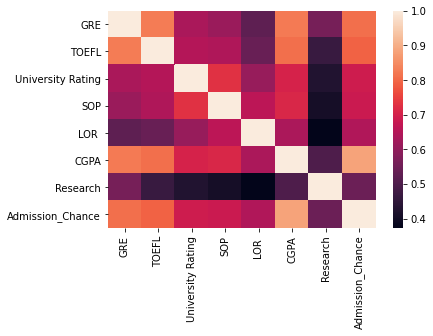

In [ ]:
corr = df.corr()

# Plotting Correlation Matrix
sns.heatmap(corr)

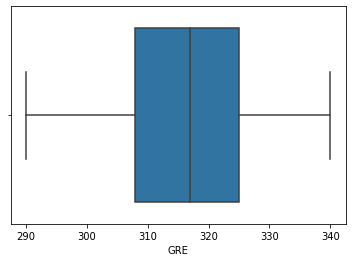

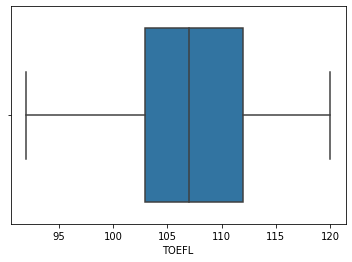

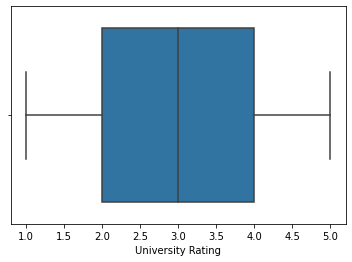

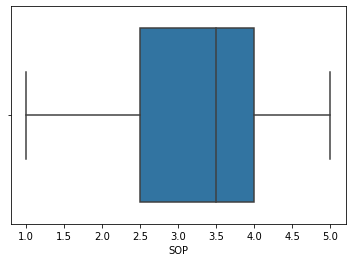

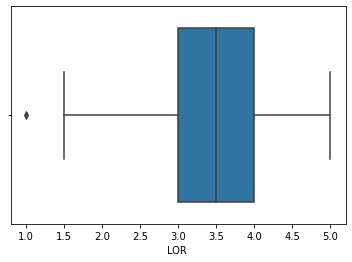

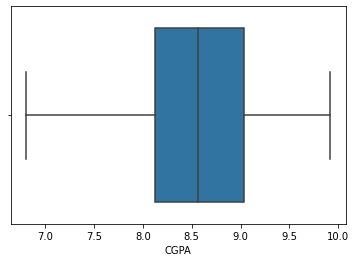

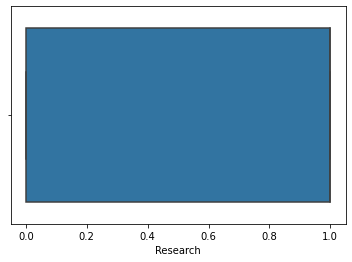

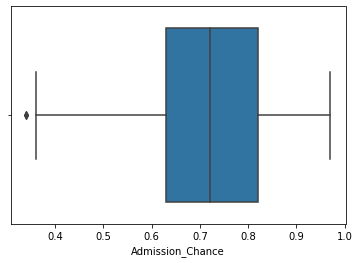

In [ ]:
for column in df:
    plt.figure()
    sns.boxplot(x=df[column])

In [ ]:
# Data Preprocessing

X= df.drop("Admission_Chance",axis=1)
Y= df["Admission_Chance"]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

scaler =  MinMaxScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [ ]:
# Creating the Artificial Neural Network

# Creating a Sequential Pipeline
model = Sequential()

# Input Layer
model.add(Dense(units = 16, activation= 'relu', input_dim = X.shape[1]))

# First Hidden Layer
model.add(Dense(units = 8, activation= 'relu'))

# Output Layer
model.add(Dense(units = 1, activation='linear'))

# Compiling the model
model.compile(optimizer = 'adam', loss="mean_squared_error", metrics = ['mean_squared_error'])

# Fitting the Model
model_history = model.fit(X_train, y_train, batch_size = 3, epochs = 30, validation_split = 0.2)

Epoch 1/30
107/107 [==============================] - 0s 2ms/step - loss: 0.0296 - mean_squared_error: 0.0296 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 2/30
107/107 [==============================] - 0s 1ms/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.0088 - val_mean_squared_error: 0.0088
Epoch 3/30
107/107 [==============================] - 0s 1ms/step - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 0.0064 - val_mean_squared_error: 0.0064
Epoch 4/30
107/107 [==============================] - 0s 1ms/step - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.0048 - val_mean_squared_error: 0.0048
Epoch 5/30
107/107 [==============================] - 0s 1ms/step - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 0.0044 - val_mean_squared_error: 0.0044
Epoch 6/30
107/107 [==============================] - 0s 1ms/step - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.0046 - val_mean_squared_error: 0.0046
Epoch 7/30
107/107 [========

### ___Model Summary___

In [ ]:
# Printing Model Structure

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 16)                128       
_________________________________________________________________
dense_32 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 9         
Total params: 273
Trainable params: 273
Non-trainable params: 0
_________________________________________________________________


### ___Model Learning Curve___

In [ ]:
print(model_history.history.keys())

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


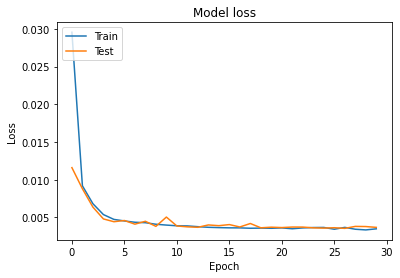

In [ ]:
# Plot Training & Validation Loss Values
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# Error Summary

prediction = model.predict(X_test)

train_error =  np.abs(np.array(y_test) - prediction)
mean_error = np.mean(train_error)
min_error = np.min(train_error)
max_error = np.max(train_error)
std_error = np.std(train_error)

print("std_error: ",std_error)
print("mean_error: ",mean_error)
print("min_error: ",min_error)
print("max_error: ",max_error)

std_error:  0.11833577670665334
mean_error:  0.167279181401968
min_error:  8.065700531023623e-06
max_error:  0.6011058008670807


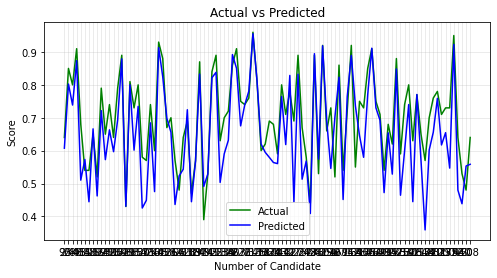

In [ ]:
# Visualising the Acutal and predicted Result

plt.figure(figsize = (8,4))
plt.plot(y_test, color = 'green', label = 'Actual')
plt.plot(prediction, color = 'blue', label = 'Predicted')

plt.grid(alpha = 0.3)
plt.xlabel('Number of Candidate')
plt.ylabel('Score')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score

print("R2 Score: ", r2_score(y_test,prediction))

R2 Score:  0.5441732796481006


## ___Model 3 - House Price Prediction___

___Problem Statement___ _: Predicting the price of house basis the below columns_

___Dataset___ _: https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data_

```
CRIM: Per capita crime rate by town
ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
INDUS: Proportion of non-retail business acres per town
CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX: Nitric oxide concentration (parts per 10 million)
RM: Average number of rooms per dwelling
AGE: Proportion of owner-occupied units built prior to 1940
DIS: Weighted distances to five Boston employment centers
RAD: Index of accessibility to radial highways
TAX: Full-value property tax rate per $10,000
PTRATIO: Pupil-teacher ratio by town
B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
LSTAT: Percentage of lower status of the population
MEDV: Median value of owner-occupied homes in $1000s
```

In [ ]:
BHNames= ['crim','zn','indus','chas','nox','rm',
         'age','dis','rad','tax','ptratio','black','lstat','medv']

url='https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
data = pd.read_csv(url, delim_whitespace=True, names=BHNames)

print(data.head(20))
print(data.info())

       crim    zn  indus  chas    nox  ...    tax  ptratio   black  lstat  medv
0   0.00632  18.0   2.31     0  0.538  ...  296.0     15.3  396.90   4.98  24.0
1   0.02731   0.0   7.07     0  0.469  ...  242.0     17.8  396.90   9.14  21.6
2   0.02729   0.0   7.07     0  0.469  ...  242.0     17.8  392.83   4.03  34.7
3   0.03237   0.0   2.18     0  0.458  ...  222.0     18.7  394.63   2.94  33.4
4   0.06905   0.0   2.18     0  0.458  ...  222.0     18.7  396.90   5.33  36.2
5   0.02985   0.0   2.18     0  0.458  ...  222.0     18.7  394.12   5.21  28.7
6   0.08829  12.5   7.87     0  0.524  ...  311.0     15.2  395.60  12.43  22.9
7   0.14455  12.5   7.87     0  0.524  ...  311.0     15.2  396.90  19.15  27.1
8   0.21124  12.5   7.87     0  0.524  ...  311.0     15.2  386.63  29.93  16.5
9   0.17004  12.5   7.87     0  0.524  ...  311.0     15.2  386.71  17.10  18.9
10  0.22489  12.5   7.87     0  0.524  ...  311.0     15.2  392.52  20.45  15.0
11  0.11747  12.5   7.87     0  0.524  .

In [ ]:
summary = data.describe()
summary = summary.transpose()
print(summary)

         count        mean         std  ...        50%         75%       max
crim     506.0    3.613524    8.601545  ...    0.25651    3.677082   88.9762
zn       506.0   11.363636   23.322453  ...    0.00000   12.500000  100.0000
indus    506.0   11.136779    6.860353  ...    9.69000   18.100000   27.7400
chas     506.0    0.069170    0.253994  ...    0.00000    0.000000    1.0000
nox      506.0    0.554695    0.115878  ...    0.53800    0.624000    0.8710
rm       506.0    6.284634    0.702617  ...    6.20850    6.623500    8.7800
age      506.0   68.574901   28.148861  ...   77.50000   94.075000  100.0000
dis      506.0    3.795043    2.105710  ...    3.20745    5.188425   12.1265
rad      506.0    9.549407    8.707259  ...    5.00000   24.000000   24.0000
tax      506.0  408.237154  168.537116  ...  330.00000  666.000000  711.0000
ptratio  506.0   18.455534    2.164946  ...   19.05000   20.200000   22.0000
black    506.0  356.674032   91.294864  ...  391.44000  396.225000  396.9000

In [ ]:
#To Scale data from 0 to 1 apply preprocessing Mms!

scaler = MinMaxScaler()
print(scaler.fit(data))
DataScaled = scaler.fit_transform(data)
DataScaled = pd.DataFrame(DataScaled, columns=BHNames)
DataScaled.head()

MinMaxScaler(copy=True, feature_range=(0, 1))


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,0.693333


In [ ]:
summary = DataScaled.describe()
summary = summary.transpose()
print(summary)

         count      mean       std  min       25%       50%       75%  max
crim     506.0  0.040544  0.096679  0.0  0.000851  0.002812  0.041258  1.0
zn       506.0  0.113636  0.233225  0.0  0.000000  0.000000  0.125000  1.0
indus    506.0  0.391378  0.251479  0.0  0.173387  0.338343  0.646628  1.0
chas     506.0  0.069170  0.253994  0.0  0.000000  0.000000  0.000000  1.0
nox      506.0  0.349167  0.238431  0.0  0.131687  0.314815  0.491770  1.0
rm       506.0  0.521869  0.134627  0.0  0.445392  0.507281  0.586798  1.0
age      506.0  0.676364  0.289896  0.0  0.433831  0.768280  0.938980  1.0
dis      506.0  0.242381  0.191482  0.0  0.088259  0.188949  0.369088  1.0
rad      506.0  0.371713  0.378576  0.0  0.130435  0.173913  1.000000  1.0
tax      506.0  0.422208  0.321636  0.0  0.175573  0.272901  0.914122  1.0
ptratio  506.0  0.622929  0.230313  0.0  0.510638  0.686170  0.808511  1.0
black    506.0  0.898568  0.230205  0.0  0.945730  0.986232  0.998298  1.0
lstat    506.0  0.301409 

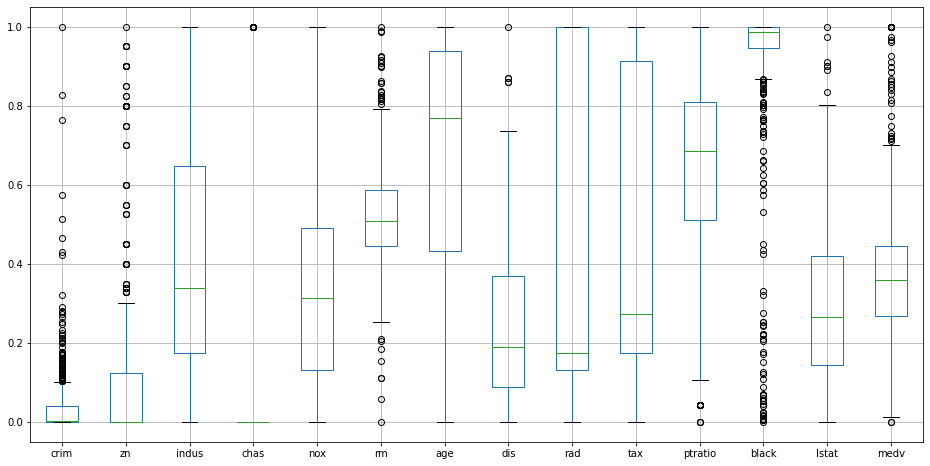

In [ ]:
plt.figure(figsize = (16,8))
boxplot = DataScaled.boxplot(column=BHNames)
plt.show()

In [ ]:
CorData = DataScaled.corr(method='pearson')
with pd.option_context('display.max_rows', None, 'display.max_columns', CorData.shape[1]):
    print(CorData)

             crim        zn     indus      chas       nox        rm       age  \
crim     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
zn      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
indus    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
chas    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
nox      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
rm      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
age      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
dis     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
rad      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
tax      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
ptratio  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
black   -0.385064  0.175520 

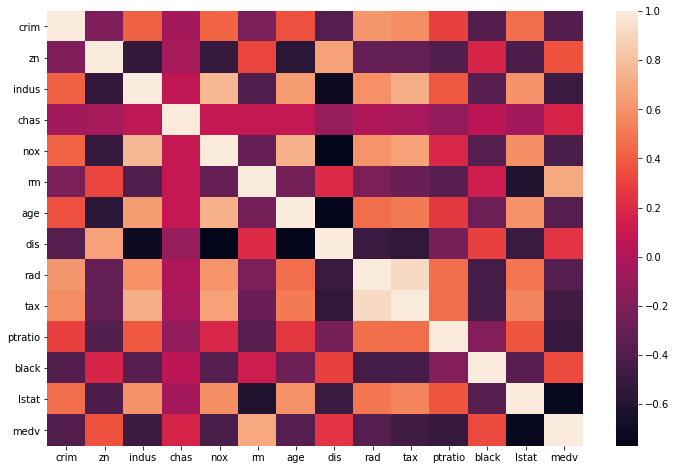

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(CorData)
plt.show()

In [ ]:
# Data Preprocessing

X = DataScaled.drop('medv', axis = 1)
print('X shape = ',X.shape)
Y = DataScaled['medv']
print('Y shape = ',Y.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 5)
print('X train shape = ',X_train.shape)
print('X test shape = ', X_test.shape)
print('Y train shape = ', Y_train.shape)
print('Y test shape = ',Y_test.shape)

X shape =  (506, 13)
Y shape =  (506,)
X train shape =  (354, 13)
X test shape =  (152, 13)
Y train shape =  (354,)
Y test shape =  (152,)


### ___Artificial Neural Network___

In [ ]:
# Creating a Neural Network

#first input and first hidden layer
model = Sequential()
model.add(Dense(20, input_dim=13, activation='relu'))

#second hidden layer
model.add(Dense(10, activation='relu'))

#output layer
model.add(Dense(1, activation='linear'))

#compile ANN
model.compile(optimizer="Adam", loss='mean_squared_error', metrics=['accuracy'])

#fit and display the summary 
model.fit(X_train,Y_train, epochs=1000, verbose=1)

Epoch 1/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.2147 - accuracy: 0.0056
Epoch 2/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.1009 - accuracy: 0.0056
Epoch 3/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0719 - accuracy: 0.0056
Epoch 4/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0583 - accuracy: 0.0056
Epoch 5/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0493 - accuracy: 0.0056
Epoch 6/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0432 - accuracy: 0.0056
Epoch 7/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0392 - accuracy: 0.0056
Epoch 8/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0363 - accuracy: 0.0056
Epoch 9/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0330 - accuracy: 0.0056
Epoch 10/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0306 - accuracy: 0.0056

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 20)                280       
_________________________________________________________________
dense_35 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 11        
Total params: 501
Trainable params: 501
Non-trainable params: 0
_________________________________________________________________


### ___Model Evaluation___

In [ ]:
#Testing the test dataset

Y_predKM =  model.predict(X_test)
score = model.evaluate(X_test,Y_test, verbose=0)
print(score[0])

0.0037944347131997347


### ___Multiple Linear Regression___

In [ ]:
#Multiple Linear Regression
from sklearn.linear_model import LinearRegression

LModel = LinearRegression()
LModel.fit(X_train, Y_train)

Y_predLM = LModel.predict(X_test)
Y_predKM[0]

array([0.8541992], dtype=float32)

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_test, Y_predLM)
print('Linear Regression Model Mean Square Error')
print(mse)

Linear Regression Model Mean Square Error
0.015159030964982022


###___Performance Comparison___

Text(0.5, 1.0, 'Keras Neural Network Model')

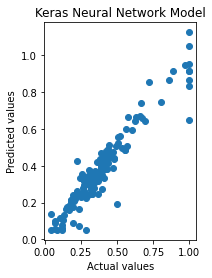

In [ ]:
plt.figure(1)
plt.subplot(121)
plt.scatter(Y_test, Y_predKM)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Keras Neural Network Model")

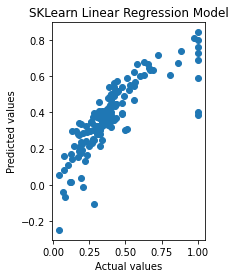

In [ ]:
plt.subplot(122)
plt.scatter(Y_test, Y_predLM)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("SKLearn Linear Regression Model")
plt.show()